In [13]:
#importing necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

In [4]:
# displays data for observation usin head method
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
#extracting data and discarding original labels

y_train = train_df['label']
y_valid = valid_df['label']
del train_df['label']
del valid_df['label']

In [6]:
#extracting images
x_train = train_df.values
x_valid = valid_df.values

In [7]:
#sumarizes training and validation data

x_train.shape
y_train.shape
x_valid.shape
y_valid.shape

(7172,)

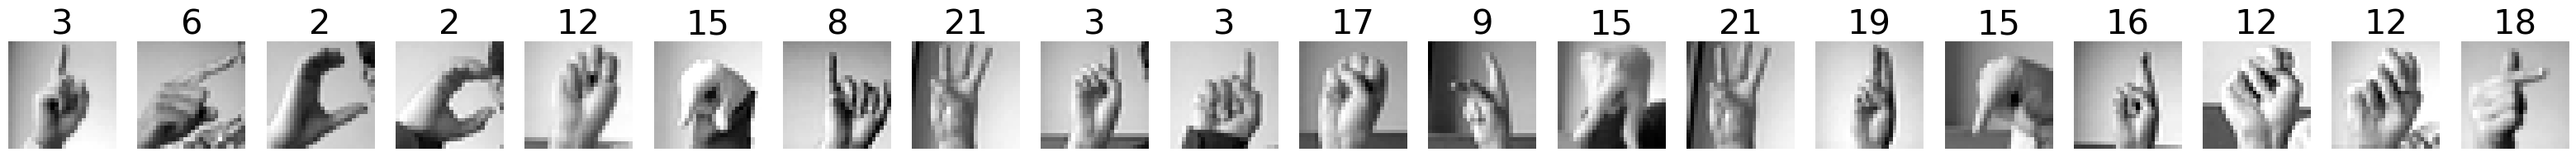

In [8]:
#allows us to visualize image set


plt.figure(figsize=(40,40))

num_images = 20
for i in range(num_images):
    row = x_train[i]
    label = y_train[i]
    
    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [9]:
#normalizes image data
x_train.min()
x_train.max()

x_train = train_df.values / 255
x_valid = valid_df.values / 255

In [11]:
#categorizes the labels


num_classes = 24

if not y_train.shape[-1] == 24:  # Avoid running multiple times
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_valid = keras.utils.to_categorical(y_valid, num_classes)

In [14]:
#bulding model

model = Sequential()
model.add(Dense(units = 512, activation='relu', input_shape=(784,)))
model.add(Dense(units = 512, activation='relu'))
model.add(Dense(units = num_classes, activation='softmax'))


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 24)                12312     
                                                                 
Total params: 676888 (2.58 MB)
Trainable params: 676888 (2.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
#compiling model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
#training model to categorize training data however, it performed poorly against new data that it has yet
#to be trined on because it is essentially memorizing the dataset but not gaining a general understanding of
#the problem

model.fit(x_train, y_train, epochs=20, verbose=1, validation_data=(x_valid, y_valid))

Epoch 1/20
858/858 [==============================] - 3s 3ms/step - loss: 1.9498 - accuracy: 0.3831 - val_loss: 2.2106 - val_accuracy: 0.4148
Epoch 2/20
858/858 [==============================] - 2s 3ms/step - loss: 0.9554 - accuracy: 0.6805 - val_loss: 1.1148 - val_accuracy: 0.6283
Epoch 3/20
858/858 [==============================] - 2s 3ms/step - loss: 0.5707 - accuracy: 0.8067 - val_loss: 1.0437 - val_accuracy: 0.6951
Epoch 4/20
858/858 [==============================] - 2s 3ms/step - loss: 0.3915 - accuracy: 0.8746 - val_loss: 1.7207 - val_accuracy: 0.6228
Epoch 5/20
858/858 [==============================] - 2s 3ms/step - loss: 0.2893 - accuracy: 0.9126 - val_loss: 0.8555 - val_accuracy: 0.7886
Epoch 6/20
858/858 [==============================] - 2s 3ms/step - loss: 0.2371 - accuracy: 0.9332 - val_loss: 1.3216 - val_accuracy: 0.7227
Epoch 7/20
858/858 [==============================] - 2s 3ms/step - loss: 0.2030 - accuracy: 0.9482 - val_loss: 1.0720 - val_accuracy: 0.7715
Epoch 